In [1]:
import os
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
#read csv citibike data
df1 = pd.read_csv('201503-citibike-tripdata.csv')
df2 = pd.read_csv('201508-citibike-tripdata.csv')
frames = [df1, df2]
df = pd.concat(frames)
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [4]:
#read json data
import urllib2
import json

In [5]:
if __name__=='__main__':
    url = 'http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/stationzips.json' 
    request = urllib2.urlopen(url)
    data = json.loads(request.read())
    sid = data.keys

In [6]:
#read manhattan data
import geopandas as gp
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")

In [7]:
#match zipcode to csv file
df['ZipCode'] = np.zeros(len(df['starttime']))
stids = np.unique(df['start station id'])
for sid in stids:
    df.loc[df['start station id']==sid,'ZipCode'] = data[str(sid)]
    
   


In [8]:
myarray1 = (df['start station id'].groupby(df['ZipCode']).count())

In [9]:
myarray2 = (bsize['UnitsRes'].groupby(bsize['ZipCode']).sum())

In [10]:
#create a new dataframe
mynewdf = pd.concat([myarray1,myarray2], axis=1,join='inner')

In [11]:
print mynewdf

         start station id  UnitsRes
ZipCode                            
10001              112915     17940
10002               84301     34505
10003              156206     33598
10004               18521      2409
10005               19425      5567
10007               41079      3732
10009               74139     33130
10010               55544     19835
10011              130030     35200
10012               63309     15412
10013               70172     15330
10014               93772     22710
10016               90529     38272
10017               60462     12625
10018               46196      5677
10019               97761     35836
10021                1039     30777
10022               39863     27676
10023               11980     41878
10036               59724     20938
10038               23482     11716
10065                  60     22873
10280               10983      5474
10281                9986         0
10282               10765      3157


#FBB: AXIS LABELS ARE ILLEGIBLY SMALL!

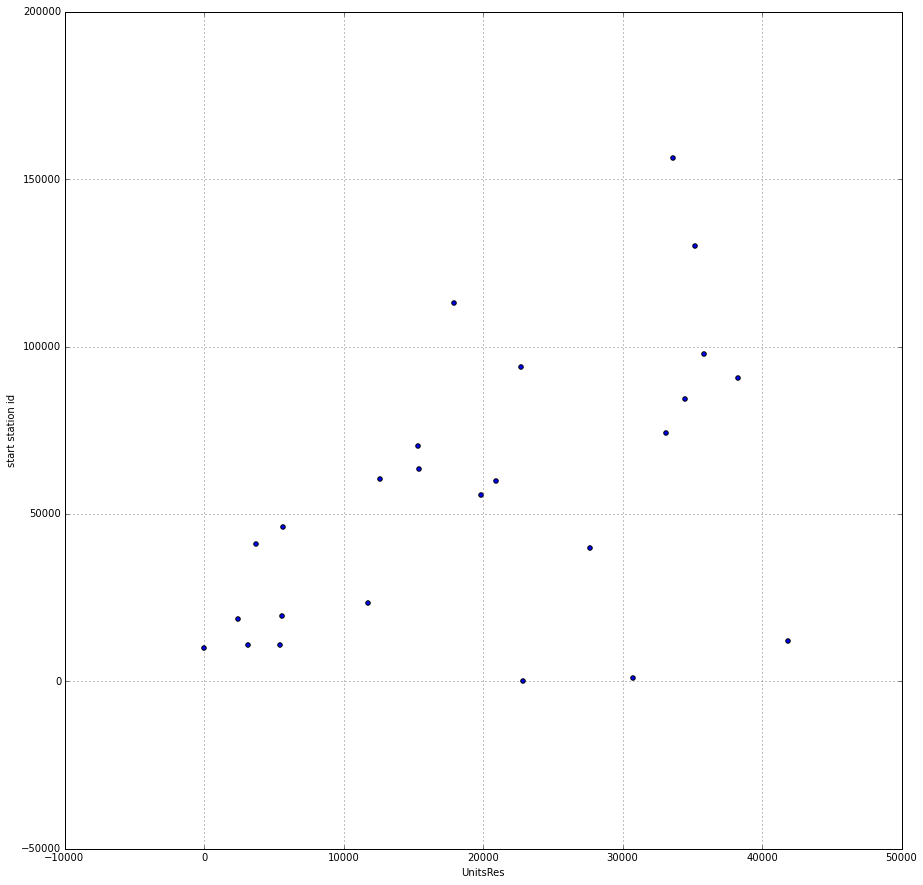

In [12]:
#first plot
fig = figure(figsize=(15,15))
mynewdf.plot(kind='scatter', x='UnitsRes', y='start station id', marker='o', figsize=(15, 15))

In [14]:
#all imports should be at the top

In [15]:
import statsmodels.api as sm

In [16]:
mynewdf.rename(columns={'start station id':'riders'}, inplace=True)

In [17]:
x = mynewdf.UnitsRes
y = mynewdf.riders

In [18]:
#first degree model
X = sm.add_constant(x)
fit1 = sm.OLS(y, X, missing='drop').fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 riders   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     7.546
Date:                Sat, 31 Oct 2015   Prob (F-statistic):             0.0115
Time:                        11:30:31   Log-Likelihood:                -297.80
No. Observations:                  25   AIC:                             599.6
Df Residuals:                      23   BIC:                             602.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.329e+04   1.39e+04      1.680      0.107     -5393.377   5.2e+04
UnitsRes       1.6120      0.587      2.747      0.011         0.398     2.826
==============================================================================
Omnibus:                        1.030   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.243
Skew:                          -0.189   Prob(JB):                        0.886
Kurtosis:                       3.299   Cond. No.                     4.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

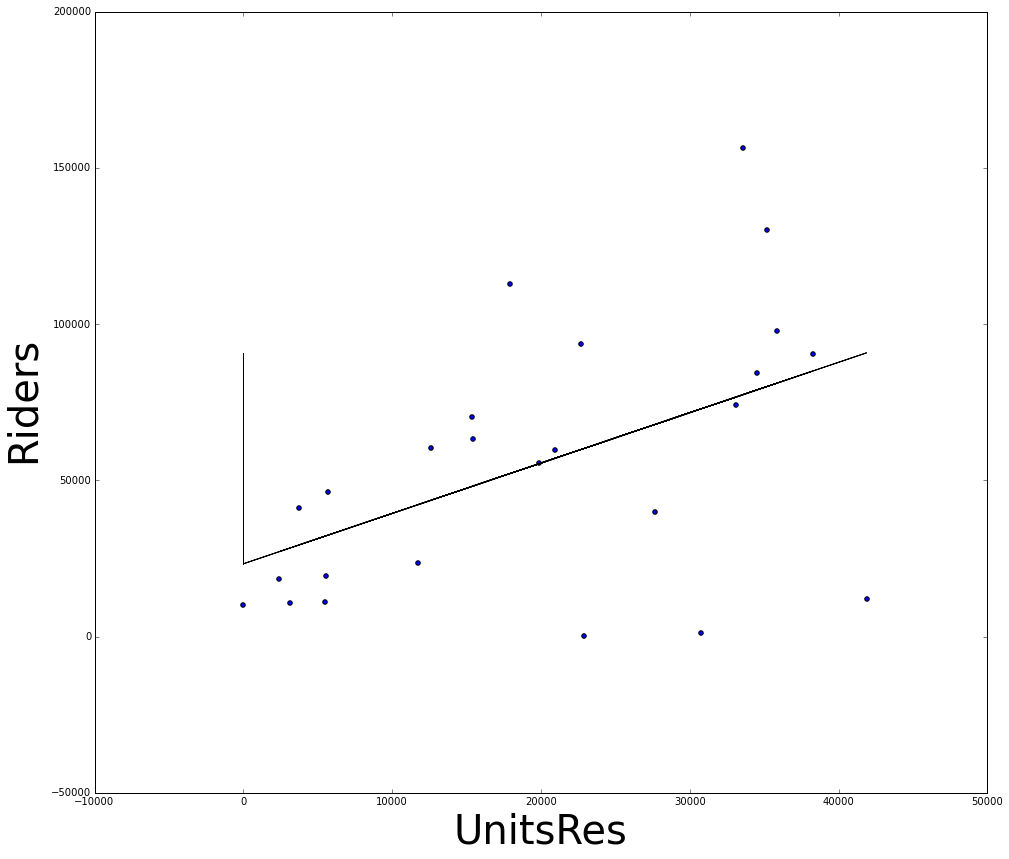

In [29]:
##what is this next line for????
x.random = np.random.choice(x[~np.isnan(x)], len(y[~np.isnan(y)]), replace=False)
pl.figure(figsize=(16, 14))
pl.scatter(x, y)

plot(X, fit1.predict(), 'k', label="fit Riders to UnitsRes")
pl.xlabel("UnitsRes", fontsize=40)
pl.ylabel("Riders", fontsize=40)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     4.471
Date:                Sat, 31 Oct 2015   Prob (F-statistic):             0.0235
Time:                        11:30:38   Log-Likelihood:                -297.08
No. Observations:                  25   AIC:                             600.2
Df Residuals:                      22   BIC:                             603.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     7892.3586   1.93e+04      0.409      0.686     -3.21e+04  4.79e+04
x1               2.0846      1.158      1.800      0.086        -0.317     4.486
I((x1))          2.0838      1.160      1.797      0.086        -0.321     4.489
I((x1) ** 2) -6.332e-05   5.56e-05     -1.140      0.267        -0.000  5.19e-05
==============================================================================
Omnibus:                        1.162   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                0.292
Skew:                          -0.194   Prob(JB):                        0.864
Kurtosis:                       3.360   Cond. No.                     2.11e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.35e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

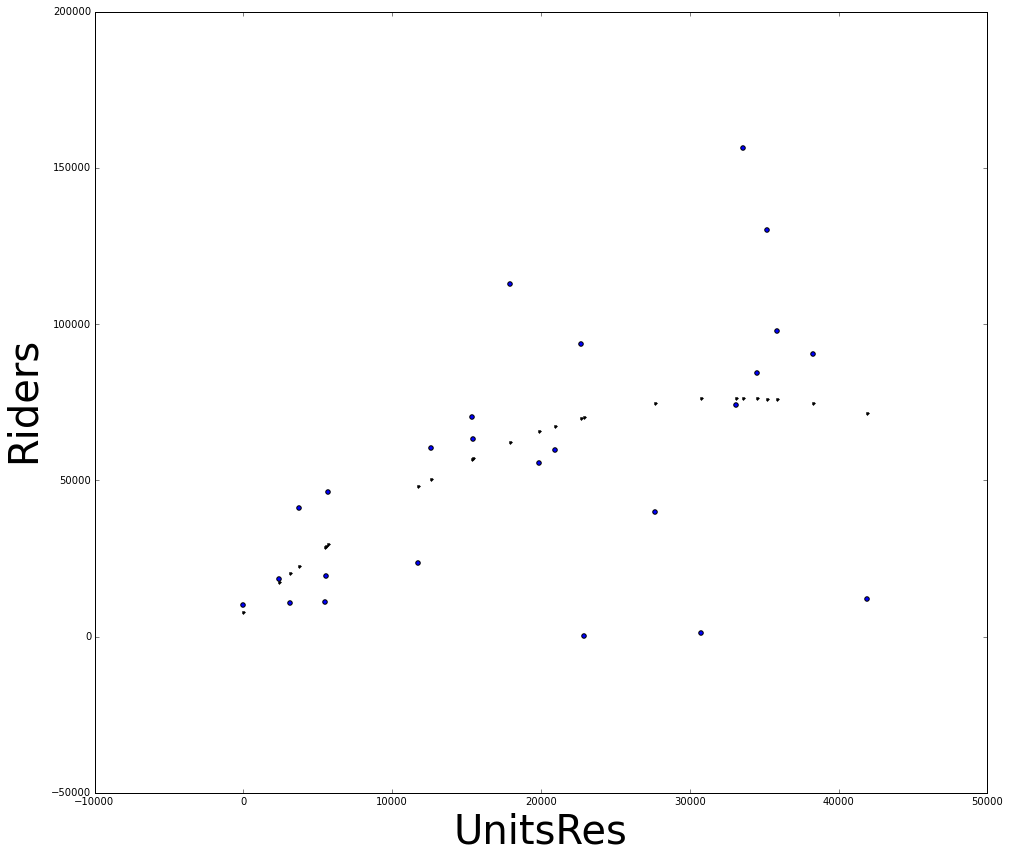

In [20]:
#second degree model
import statsmodels.formula.api as smf
fit2 = smf.ols(formula = "y ~ x1 + I((x1)) + I((x1)**2) ", 
        data={'x1':x,'y': y}).fit()
pl.figure(figsize=(16, 14))
pl.scatter(x, y)
plot(x, fit2.predict(), 'k.')
pl.xlabel("UnitsRes", fontsize=40)
pl.ylabel("Riders", fontsize=40)
fit2.summary()

Based on the OLS results, the second degree model seems better since it has a higher R2. We can use likelihood test to compare two models since it is hierarchy models. 

In [21]:
#Likelihood Test, compare first and second degree model
#degrees of freedom =1, alpha=0.05, so chi2 value= 3.84
#H0: the linear model is better
llf1=fit1.llf
llf2=fit2.llf
like = -2*(llf1-llf2)
print like

1.43372170593


Based on the likelihood test results, the critical value 1.434 is less than 3.84, so we do not reject H0 and thus conclude that the linear model is better.

Findigns: we can find that with the increase of unitsresidence, the ridership also increases, but only a little. Overall the models are not performing well because the R2 is a litter bit low. Thus there may not be a strong relationship between unitsresidence and citibike ridership in Manhattan.
How to improve?
Maybe we can import more data to imporve the models, such as Brooklyn residence vs ridership. Maybe it is a good idea to import rush hour times into the model since citibikes may be in high demand at this time of the day. Income level or education level may be good predictors to add. 

#FBB good work so far: everything is correct. You miss the analysis after removal of the outliers. 

-2 

8/10